# Proyek Analisis Data: Bike Sharing
- **Nama:** Alifia Mustika Sari
- **Email:** alifiamustika02@gmail.com
- **ID Dicoding:** a463xbf048

## 1. Menentukan Pertanyaan Bisnis

Pertama-tama, kita akan mendefinisikan berbagai pertanyaan bisnis yang akan dibutuhkan saat eksplorasi data.
- `Pertanyaan 1:` Bagaimana tren jumlah peminjaman sepeda dalam beberapa tahun terakhir? FIX
- `Pertanyaan 2:` Seberapa berpengaruh kondisi cuaca, suhu, dan kecepatan angin terhadap jumlah peminjaman sepeda? FIX
- `Pertanyaan 3:` Pada pukul berapa permintaan peminjaman sepeda paling tinggi dan paling rendah? FIX
- `Pertanyaan 4:` Bulan apa saja yang paling banyak dan paling sedikit diminati bagi penyewa sepeda? FIX
- `Pertanyaan 5:` 

## 2. Import Semua Packages/Library yang Digunakan

In [532]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 3. Data Wrangling

### 3.1. Gathering Data

In [533]:
# Memuat data day
df_day = pd.read_csv(r'data\day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [534]:
# Memuat data hour
df_hour = pd.read_csv(r'data\hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data `df_day` lebih cocok untuk menganalisis tren jangka panjang, seperti pola mingguan, bulanan, musiman, atau tahunan, karena data sudah terakumulasi per hari.
- Data `df_hour` lebih sesuai untuk melihat pola penggunaan sepeda pada jam tertentu dalam sehari, memungkinkan analisis terhadap waktu-waktu dengan tingkat penyewaan tertinggi atau terendah.

### 3.2. Assessing Data (FIX)

#### Menilai Data df_day (FIX)

Memeriksa `seluruh parameter termasuk non-numerik` yang terdapat pada table `df_day`.

In [535]:
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Berdasarkan deskripsi statistik untuk table `df_day` diatas, dapat dilihat bahwa tidak terdapat parameter statistik yang tidak sesuai dengan kolom atau atribut dari masing-masing data pada table tersebut.

Kemudian `cek seluruh tipe data` dari masing-masing kolom yang terdapat pada table `df_day`.

In [536]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan informasi data pada table `df_day` diatas, dapat dilihat bahwa terdapat sebanyak 16 kolom data, 731 baris data non-null untuk semua kolom data, dengan tipe data `float` sebanyak 4 kolom, `integer` sebanyak 11 kolom, dan `object` sebanyak 1 kolom data.

Setelah dilakukan analisis lebih lanjut, terdapat kesalahan pada 1 tipe data kolom `dteday`, yaitu yang awalnya `object` seharusnya bertipe data `datetime`.

In [537]:
print("Jumlah data df_day yang terdapat missing value:")
df_day.isnull().sum()

Jumlah data df_day yang terdapat missing value:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil pengecekan missing value atau data yang hilang (NaN) dari table `df_day`, dapat dilihat bahwa tidak terdapat data yang hilang pada table `df_day` sehingga `data tersebut dapat dikatakan aman`.

In [538]:
print("Jumlah Duplikasi pada Data df_day:", df_day.duplicated().sum())

Jumlah Duplikasi pada Data df_day: 0


Berdasarkan hasil pengecekan duplikasi data pada table `df_day`, dapat dilihat bahwa tidak terdapat duplikasi data pada table `df_day` yang berarti `semua data bersifat unik`.

#### Menilai Data df_hour (FIX)

Memeriksa `seluruh parameter termasuk non-numerik` yang terdapat pada table `df_hour`.

In [539]:
df_hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan deskripsi statistik untuk table `df_hour` diatas, dapat dilihat bahwa tidak terdapat parameter statistik yang tidak sesuai dengan kolom atau atribut dari masing-masing data pada table tersebut.

Kemudian `cek seluruh tipe data` dari masing-masing kolom yang terdapat pada table `df_hour`.

In [540]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan informasi data pada table `df_hour` diatas, dapat dilihat bahwa terdapat sebanyak 17 kolom data, 17379 baris data non-null untuk semua kolom data, dengan tipe data `float` sebanyak 4 kolom, `integer` sebanyak 12 kolom, dan `object` sebanyak 1 kolom data.

Setelah dilakukan analisis lebih lanjut, terdapat kesalahan pada 1 tipe data kolom `dteday`, yaitu yang awalnya `object` seharusnya bertipe data `datetime`.

In [541]:
print("Jumlah data df_day yang terdapat missing value:")
df_hour.isnull().sum()

Jumlah data df_day yang terdapat missing value:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil pengecekan missing value atau data yang hilang (NaN) dari table `df_hour`, dapat dilihat bahwa tidak terdapat data yang hilang pada table `df_hour` sehingga `data tersebut dapat dikatakan aman`.

In [542]:
print("Jumlah Duplikasi pada Data df_day:", df_hour.duplicated().sum())

Jumlah Duplikasi pada Data df_day: 0


Berdasarkan hasil pengecekan duplikasi data pada table `df_hour`, dapat dilihat bahwa tidak terdapat duplikasi data pada table `df_hour` yang berarti `semua data bersifat unik`.

**Insight:**
- Terdapat `kesalahan tipe data` kolom `dteday` pada masing-masing table `df_day` dan `df_hour` yang bertipe data `object` disarankan untuk diganti menjadi tipe data `datetime` agar mempermudah dalam analisis berbasis waktu.
- Terdapat `kesalahan tipe data` kolom `season, yr, mnth, holiday, weekday, workingday, weathersit` pada masing-maisng table `df_day` dan `df_hour` yang memiliki tipe data `integer` disarankan untuk diganti menjadi tipe data `category` agar lebih efisien dalam penyimpanan dan analisis.
- Terdapat beberapa kolom yang tidak diperlukan seperti kolom `instant`. Kolom `instant` ini hanya ID urutan baris yang tidak memiliki makna dalam analisis sehingga perlu diabaikan atau dihapus.

### 3.3. Cleaning Data

#### 3.3.1. Membersihkan Data df_day

##### Dropping Kolom (FIX)

Menghapus kolom `instant` yang tidak diperlukan dalam analisis.

In [543]:
df_day.drop(['instant'], axis = 1, inplace= True)

##### Mengganti Tipe Data (FIX)

Memperbaiki tipe data kolom `dteday` pada table `df_day` yang bertipe `object` menjadi `datetime`.

In [544]:
for column in ["dteday"]:
  df_day[column] = pd.to_datetime(df_day[column])

Selain itu, kita perlu memperbaiki tipe data beberapa kolom `('season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit')` dari tipe data `integer` menjadi `category`

In [545]:
for column in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
     df_day[column] = df_day[column].astype('category')

Kemudian dapat dilihat dan dilakukan pengecekan ulang informasi pada table `df_day` untuk kolom `dteday` telah berubah menjadi `datetime`. Sedangkan, untuk kolom `'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit` berubah menjadi `category`.

In [546]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2

##### Mengganti Nama Kolom (FIX)

Memperbaiki beberapa nama kolom `'dteday','yr','mnth','weekday','weathersit','windspeed','cnt','hum'` pada table `df_day` agar lebih mudah dibaca.

In [547]:
df_day.rename(columns={'dteday':'date','yr':'year','mnth':'month','weekday':'weekday', 
                       'weathersit':'weather_condition', 'windspeed':'wind_speed',
                       'cnt':'count_rent','hum':'humidity'},inplace=True)

In [548]:
print(list(df_day.columns))

['date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition', 'temp', 'atemp', 'humidity', 'wind_speed', 'casual', 'registered', 'count_rent']


##### Label dan Ordinal Encoding (FIX)

Melihat `deskripsi Bike Sharing dataset` yang diberikan oleh pemilik atau author dataset.

In [549]:
f = open('data/Readme.txt', 'r')

print(f.read())

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

Berdasarkan karateristik dataset pada Readme.txt, dapat dilihat bahwa beberapa kolom data pada table `df_day` telah melalui tahap label dan encoding. Maka dari itu untuk dapat memproses lebih lanjut, perlu untuk mengembalikan nilai aslinya dengan menggunakan `teknik label dan ordinal decoding`.

In [550]:
df_day['season'] = df_day['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_day['year'] = df_day['year'].map({0: 2011, 1: 2012})
df_day['holiday'] = df_day['holiday'].map({0: 'Not Holiday', 1: 'Holiday'})
df_day['workingday'] = df_day['workingday'].map({0: 'Holiday', 1: 'Working Day'})
df_day['weekday'] = df_day['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df_day['weather_condition'] = df_day['weather_condition'].map({1: 'Clear', 2: 'Misty', 3: 'Light Snow', 4: 'Heavy Rain'})

In [551]:
print("df_day Unique Values")
columns = ['season', 'year', 'holiday', 'workingday', 'weekday', 'weather_condition']

for column in columns:
    print(f"{column:<22}: {df_day[column].unique()}")

df_day Unique Values
season                : ['Springer', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Springer', 'Summer', 'Fall', 'Winter']
year                  : [2011, 2012]
Categories (2, int64): [2011, 2012]
holiday               : ['Not Holiday', 'Holiday']
Categories (2, object): ['Not Holiday', 'Holiday']
workingday            : ['Holiday', 'Working Day']
Categories (2, object): ['Holiday', 'Working Day']
weekday               : ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Categories (7, object): ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weather_condition     : ['Misty', 'Clear', 'Light Snow']
Categories (3, object): ['Clear', 'Misty', 'Light Snow']


##### Denormalize Numeric Value (FIX)

Seperti data kategorikal sebelumnya, beberapa kolom data pada table df_day telah melewati proses normalisasi, sehingga kita perlu mengembalikannya ke nilai aslinya dengan `teknik denormalisasi nilai`.

In [552]:
df_day['temp'] = (df_day['temp']) * 41                 # Suhu asli dalam derajat C
df_day['atemp'] = (df_day['atemp']) * 50               # Suhu terasa dalam derajat C
df_day['humidity'] = (df_day['humidity']) * 100        # Kelembaban dalam %
df_day['wind_speed'] = (df_day['wind_speed']) * 67     # Kecepatan angin dalam km/h

#### 3.3.2. Membersihkan Data df_hour

##### Dropping Kolom (FIX)

Menghapus kolom `instant` yang tidak diperlukan dalam analisis.

In [553]:
df_hour.drop(['instant'], axis = 1, inplace= True)

##### Mengganti Tipe Data (FIX)

Memperbaiki tipe data kolom `dteday` pada table `df_hour` yang bertipe `object` menjadi `datetime`.

In [554]:
for column in ["dteday"]:
  df_hour[column] = pd.to_datetime(df_hour[column])

Selain itu, kita perlu memperbaiki tipe data beberapa kolom `('season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit')` dari tipe data `integer` menjadi `category`

In [555]:
for column in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
     df_hour[column] = df_hour[column].astype('category')

Kemudian dapat dilihat dan dilakukan pengecekan ulang informasi pada table `df_hour` untuk kolom `dteday` telah berubah menjadi `datetime`. Sedangkan, untuk kolom `'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit` berubah menjadi `category`.

In [556]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: category(7), dateti

##### Mengganti Nama Kolom (FIX)

Memperbaiki beberapa nama kolom `'dteday','yr','mnth','weekday','weathersit','windspeed','cnt','hum'` pada table `df_hour` agar lebih mudah dibaca.

In [557]:
df_hour.rename(columns={'dteday':'date','yr':'year','mnth':'month','hr':'hour','weekday':'weekday', 
                       'weathersit':'weather_condition', 'windspeed':'wind_speed',
                       'cnt':'count_rent','hum':'humidity'},inplace=True)

In [558]:
print(list(df_hour.columns))

['date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather_condition', 'temp', 'atemp', 'humidity', 'wind_speed', 'casual', 'registered', 'count_rent']


##### Label dan Ordinal Encoding (FIX)

Melihat `deskripsi Bike Sharing dataset` yang diberikan oleh pemilik atau author dataset.

In [559]:
f = open('data/Readme.txt', 'r')

print(f.read())

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

Berdasarkan karateristik dataset pada Readme.txt, dapat dilihat bahwa beberapa kolom data pada table `df_day` telah melalui tahap label dan encoding. Maka dari itu untuk dapat memproses lebih lanjut, perlu untuk mengembalikan nilai aslinya dengan menggunakan `teknik label dan ordinal decoding`.

In [560]:
df_hour['season'] = df_hour['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_hour['year'] = df_hour['year'].map({0: 2011, 1: 2012})
df_hour['holiday'] = df_hour['holiday'].map({0: 'Not Holiday', 1: 'Holiday'})
df_hour['workingday'] = df_hour['workingday'].map({0: 'Holiday', 1: 'Working Day'})
df_hour['weekday'] = df_hour['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df_hour['weather_condition'] = df_hour['weather_condition'].map({1: 'Clear', 2: 'Misty', 3: 'Light Snow', 4: 'Heavy Rain'})

In [561]:
print("df_day Unique Values")
columns = ['season', 'year', 'holiday', 'workingday', 'weekday', 'weather_condition']

for column in columns:
    print(f"{column:<22}: {df_hour[column].unique()}")

df_day Unique Values
season                : ['Springer', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Springer', 'Summer', 'Fall', 'Winter']
year                  : [2011, 2012]
Categories (2, int64): [2011, 2012]
holiday               : ['Not Holiday', 'Holiday']
Categories (2, object): ['Not Holiday', 'Holiday']
workingday            : ['Holiday', 'Working Day']
Categories (2, object): ['Holiday', 'Working Day']
weekday               : ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Categories (7, object): ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weather_condition     : ['Clear', 'Misty', 'Light Snow', 'Heavy Rain']
Categories (4, object): ['Clear', 'Misty', 'Light Snow', 'Heavy Rain']


##### Denormalize Numeric Value (FIX)

Seperti data kategorikal sebelumnya, beberapa kolom data pada table `df_hour` telah melewati proses normalisasi, sehingga kita perlu mengembalikannya ke nilai aslinya dengan `teknik denormalisasi nilai`.

In [562]:
df_hour['temp'] = (df_hour['temp']) * 41                 # Suhu asli dalam derajat C
df_hour['atemp'] = (df_hour['atemp']) * 50               # Suhu terasa dalam derajat C
df_hour['humidity'] = (df_hour['humidity']) * 100        # Kelembaban dalam %
df_hour['wind_speed'] = (df_hour['wind_speed']) * 67     # Kecepatan angin dalam km/h

**Insight:**
- xxx
- xxx

#### 3.3.3. Simpan Data df_day dan df_hour

In [563]:
df_day.to_csv(r'dashboard/day_cleaned.csv')
df_hour.to_csv(r'dashboard/hour_cleaned.csv')

## 4. Exploratory Data Analysis (EDA)

### Eksplorasi Data df_day

In [564]:
# melihat jumlah penyewa di cuaca tertentu
df_day.groupby(by='season').count_rent.sum().sort_values(ascending=False).reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_9956\2614016375.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,season,count_rent
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Springer,471348


**Insight:**
- xxx
- xxx

### Eksplorasi Data df_hour

In [565]:
df_hour.describe(include='all')

,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,wind_speed,casual,registered,count_rent
count,17379,17379,17379.0,17379.0,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2.0,12.0,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012.0,5.0,NaN,Not Holiday,Saturday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734.0,1488.0,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


Analisis Statistik Peminjaman Sepeda Berdasarkan Cuaca (weather_situation)

In [566]:
df_hour.groupby(by='weather_situation')['count_rent'].agg(['max', 'min', 'mean', 'sum'])

KeyError: 'weather_situation'

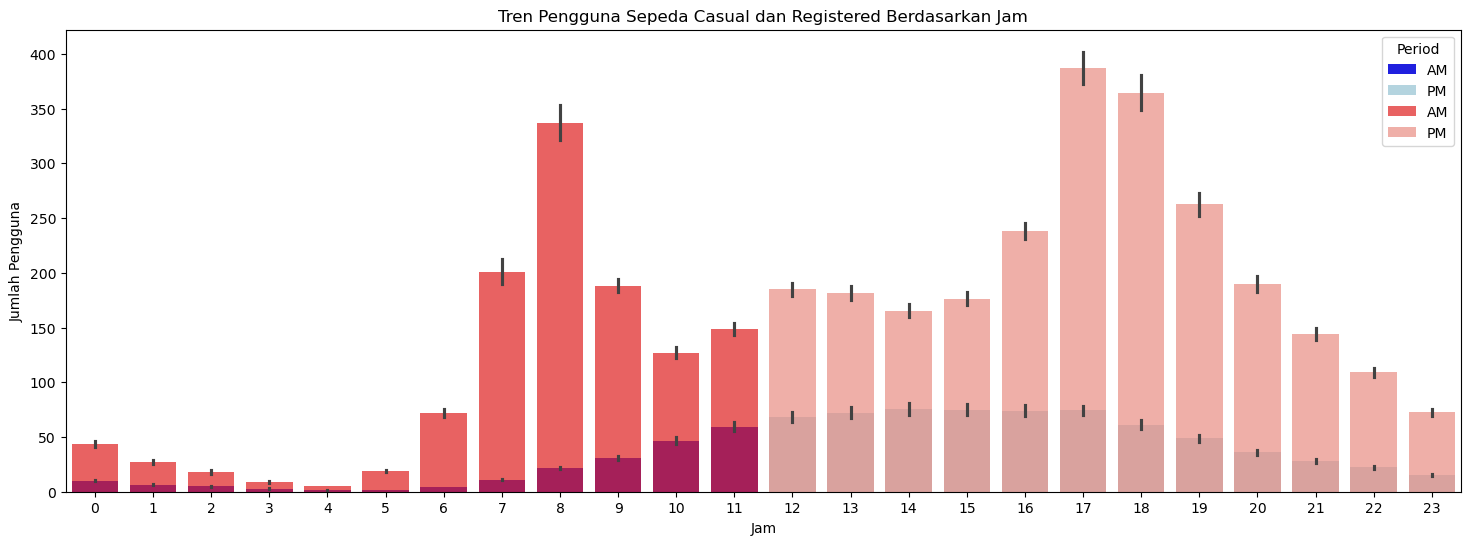

In [ ]:
# Menambahkan kolom AM/PM
df_hour['period'] = df_hour['hour'].apply(lambda x: 'AM' if x < 12 else 'PM')

plt.figure(figsize=(18, 6))
sns.barplot(data=df_hour, x='hour', y='casual', hue='period', palette={"AM": "blue", "PM": "lightblue"})
sns.barplot(data=df_hour, x='hour', y='registered', hue='period', palette={"AM": "red", "PM": "salmon"}, alpha=0.7)

plt.xlabel("Jam")
plt.ylabel("Jumlah Pengguna")
plt.title("Tren Pengguna Sepeda Casual dan Registered Berdasarkan Jam")
plt.legend(title="Period")
plt.show()

In [ ]:
df_hour.groupby(by='hour').count_rent.sum().sort_values(ascending=False).reset_index().head()

,hour,count_rental
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789


C:\Users\User\AppData\Local\Temp\ipykernel_9956\3131788389.py:8: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



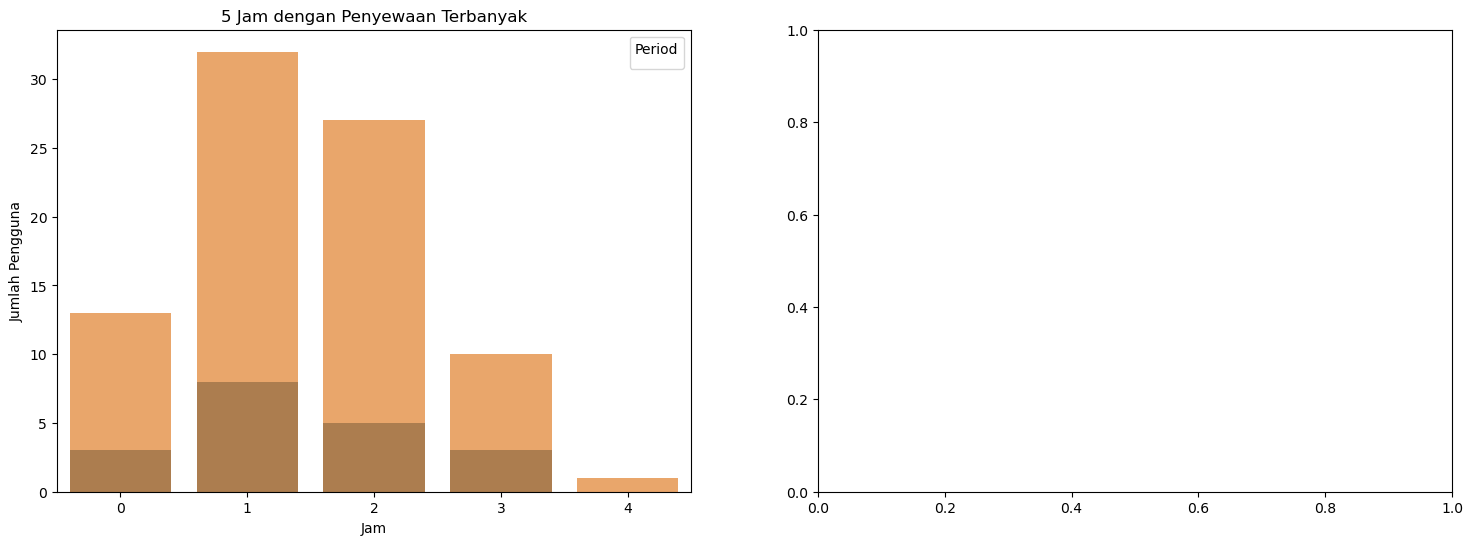

In [ ]:


fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=df_hour.head(), x='hour', y='casual', ax=axes[0])
sns.barplot(data=df_hour.head(), x='hour', y='registered', alpha=0.7, ax=axes[0])
axes[0].set_title("5 Jam dengan Penyewaan Terbanyak")
axes[0].set_xlabel("Jam")
axes[0].set_ylabel("Jumlah Pengguna")
axes[0].legend(title="Period")

plt.show()

## 5. Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

### Pertanyaan 3: Pada pukul berapa permintaan peminjaman sepeda paling tinggi dan paling rendah?

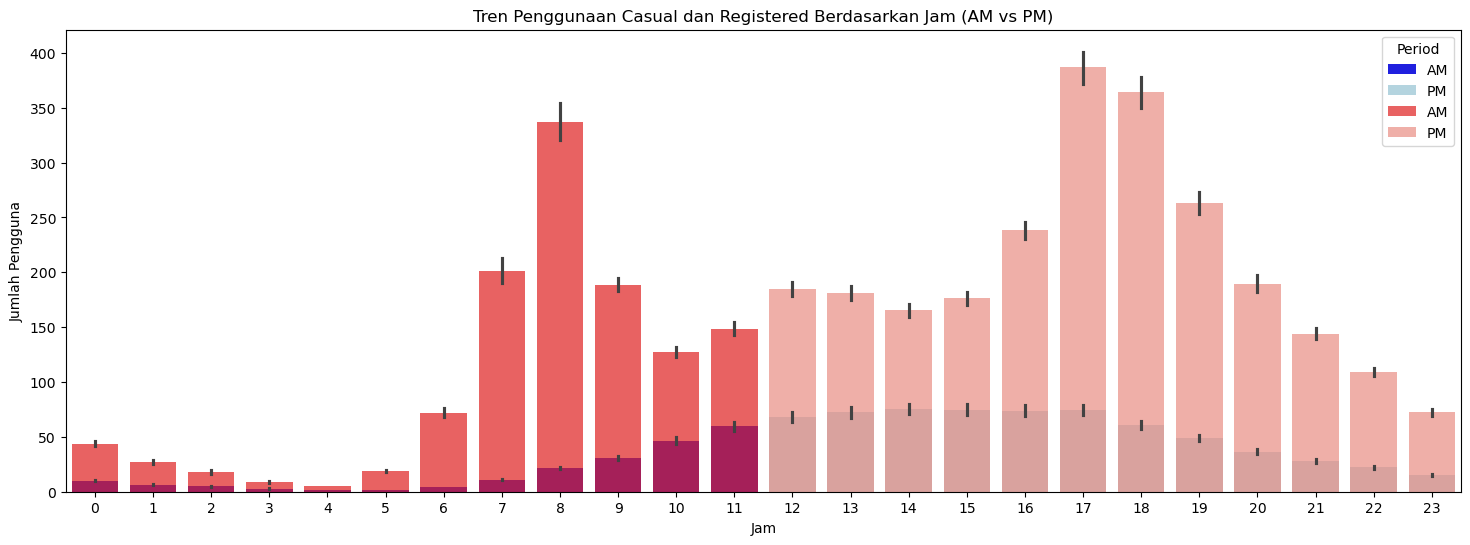

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df_hour, x='hour', y='casual', hue='period', palette={"AM": "blue", "PM": "lightblue"})
sns.barplot(data=df_hour, x='hour', y='registered', hue='period', palette={"AM": "red", "PM": "salmon"}, alpha=0.7)

plt.xlabel("Jam")
plt.ylabel("Jumlah Pengguna")
plt.title("Tren Penggunaan Casual dan Registered Berdasarkan Jam (AM vs PM)")
plt.legend(title="Period")
plt.show()


**Insight:**
- xxx
- xxx

## 6. Menerapkan Analisis Lanjutan

### 1. Analisis RFM

### 2. Analisis Clustering

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2